# Homework 01

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import math
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
cd D:\Academics\FML

D:\Academics\FML


### Importing Data

Here we import the data using pandas library and then select 12 parameters for our input matrix X

In [3]:
data = pd.read_csv("hour.csv")

## Exploratory Data Analysis and Preprocessing
### Correlation matrix and Heat Map

Here we compute the correlation matrix of the input data and plot its corresponding heat map. 
The heat map shows the correlation of the parameters with respect to each other.


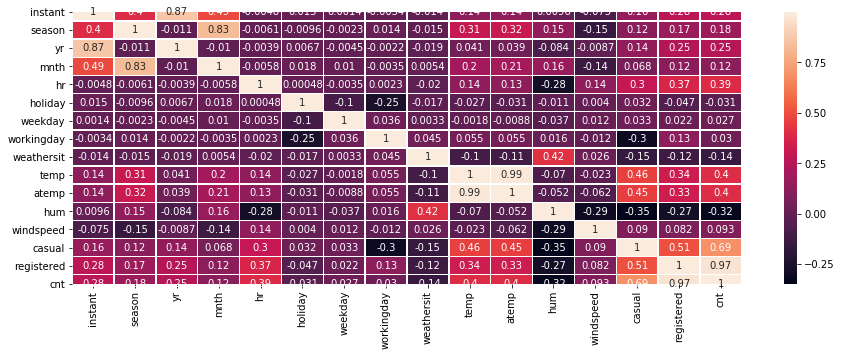

In [4]:
data = data.drop('dteday', 1)
a = data-data.mean()
b = a.T@a
c = b/17379
Std_X = data.std()
d = np.multiply.outer(Std_X.to_numpy(),Std_X.to_numpy())
e = c/d
plt.figure(figsize = (15,5))
sb.heatmap(e, annot = True,  linewidths = .5)

## Comments on the auto correlation matrix:
1. As we can observe the diagonal elements values are 1 since a feature is completely correlated with itself.
2. The season and the month, are highly correlated as observed in the matrix with correlation as 0.83
3. There is also a high correlation of temp and atemp i.e 0.99.
4. Moreover, the value of count and registered has a correlation of 0.97.That means the value of count is highly dependent on registered.

### Pairplot of each feature with respect to the count

In [5]:
data = pd.read_csv("hour.csv")

# Instant Vs Count

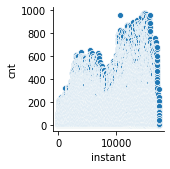

In [6]:
g= sb.pairplot(data,x_vars=['instant'], y_vars=["cnt"])

## Observation: 
Since instant is a running number, there are a lot of data points in the graph. Since its just a running number, the count value is not dependent on instant at all. 

# Date Vs Count

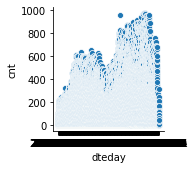

In [7]:
g= sb.pairplot(data,x_vars=['dteday'], y_vars=["cnt"])

# Observations : 
As we can observe that the plot coming here does not give any useful information. However, we do come to know that as the time increases the number of cycles sold also increases. So we can infer that the company did well in 2012 compared to 2011. However, this is does not have predictive power, it is the other features that actually affect this count.

### Season Vs Count Pairplot

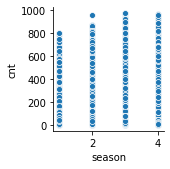

In [8]:
 g = sb.pairplot(data,
                  x_vars=['season'], y_vars=["cnt"])

### Season Vs Count(Mean value)

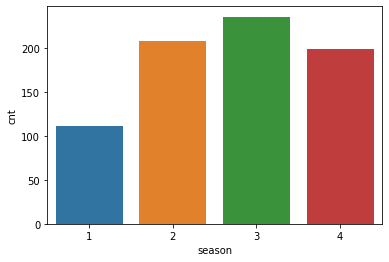

In [9]:
g = data.groupby(['season'],as_index=False).mean()
g.columns
sb.barplot(data=g, x='season', y='cnt')

### Observations : 
As seen from the bar chart above, the mean value of the count is different for different seasons. Hence we conclude that the value of count is dependent on the season.

### Year Vs Count

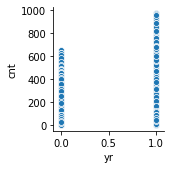

In [10]:
g = sb.pairplot(data,
                  x_vars=['yr'], y_vars=["cnt"])

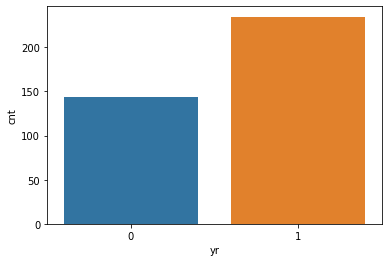

In [11]:
g = data.groupby(['yr'],as_index=False).mean()
g.columns
sb.barplot(data=g, x='yr', y='cnt')

### Observation : 
Although we can observe that the mean value of the count increases from 2011 to 2012, however, the mean increase can be due to other parameteres that lead us to the increase in the count here.

### Month Vs Count

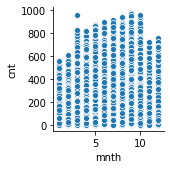

In [12]:
 g = sb.pairplot(data,
                  x_vars=['mnth'], y_vars=["cnt"])

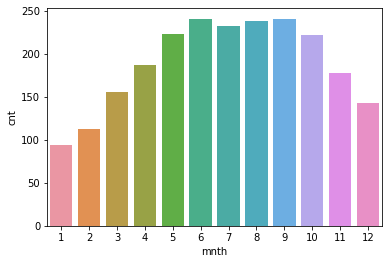

In [13]:
g = data.groupby(['mnth'],as_index=False).mean()
g.columns
sb.barplot(data=g, x='mnth', y='cnt')

### Observation:
We can observe great variation in the mean count values with respect to the month, hence we say that month does have a good predicting power on count.

### Hour Vs Count

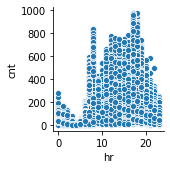

In [14]:
 g = sb.pairplot(data,
                  x_vars=['hr'], y_vars=["cnt"])

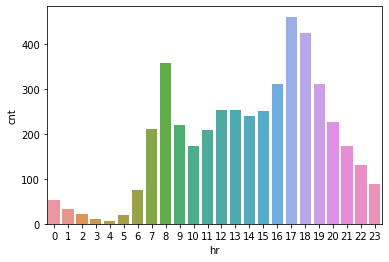

In [15]:
g = data.groupby(['hr'],as_index=False).mean()
g.columns
sb.barplot(data=g, x='hr', y='cnt')

### Observation : 
As we can observe, there are certain hours of the day, where the count is very high. For example, the count increases in the morning at 8am and then decreases. Moreover, the count peaks at 5pm in the evening. This means that the hour of the day has a high predicting power. 

## Holiday Vs Count

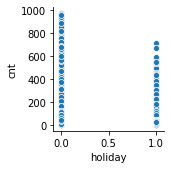

In [16]:
 g = sb.pairplot(data,
                  x_vars=['holiday'], y_vars=["cnt"])

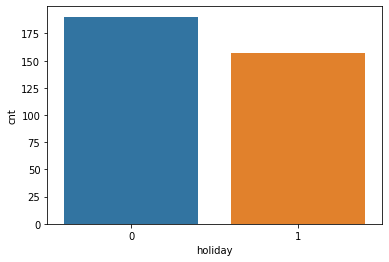

In [17]:
g = data.groupby(['holiday'],as_index=False).mean()
sb.barplot(data=g, x='holiday', y='cnt')

### Observation : 
As we can observe that the count is more on a non-holiday. We can infer that more people would be commuting on a non holiday to work. However, the mean difference between the holiday and non holiday count is not as much. So this feature has low predicting power. 

## Weekday Vs Count

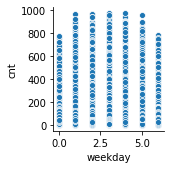

In [18]:
 g = sb.pairplot(data,
                  x_vars=['weekday'], y_vars=["cnt"])

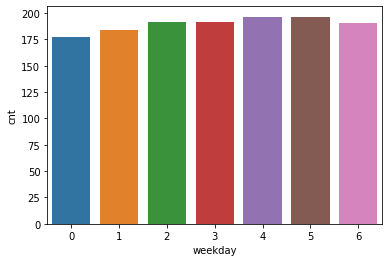

In [19]:
g = data.groupby(['weekday'],as_index=False).mean()
sb.barplot(data=g, x='weekday', y='cnt')

### Observation :
As one can observe from the above graph that the mean of all the days are almost the same with minor differences. For example, 0 i.e Sunday has less number of people, but the difference is not very high. Hence weekday has low predictive power. Because of its low predictive power we can drop weekday as well, thus making our model less complex.

## Workingday Vs Count

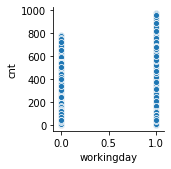

In [20]:
 g = sb.pairplot(data,
                  x_vars=['workingday'], y_vars=["cnt"])

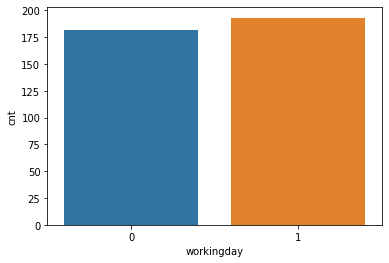

In [21]:
g = data.groupby(['workingday'],as_index=False).mean()
sb.barplot(data=g, x='workingday', y='cnt')

## Observation: 
The number of cycles sold on a working day are more than the weekend. But the difference is not significantly high. Thus this feature has a low predictive power. Working day can be derived from weekday and holiday and thus we can discard this feature.

# Weathersit Vs Count

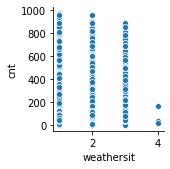

In [22]:
 g = sb.pairplot(data,
                  x_vars=['weathersit'], y_vars=["cnt"])

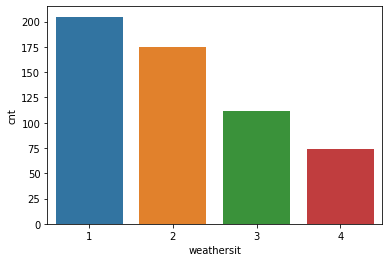

In [23]:
g = data.groupby(['weathersit'],as_index=False).mean()
sb.barplot(data=g, x='weathersit', y='cnt')

## Observation: 
As we can observe there is a great variation of count with respect to the weathersit. Hence this feature should be included as it has some predictive power.

# Temp Vs Count

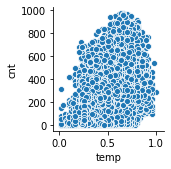

In [24]:
 g = sb.pairplot(data,
                  x_vars=['temp'], y_vars=["cnt"])

# Observation: 
As we can observe, the count is high when the temperature is moderate and low when the temperature is low. Thus temperature does have an impact on the value of the count. Thus we include this feature.

# atemp Vs cnt

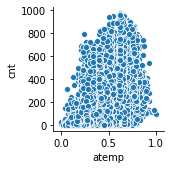

In [25]:
 g = sb.pairplot(data,
                  x_vars=['atemp'], y_vars=["cnt"])

## Observation:
Even here we can see that the count is high at moderate temperatures and less in low temperatures and very high temperatures. However, we remove this feature as it has a strong correlation with temp.

## Humidity Vs Count

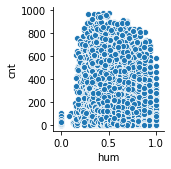

In [26]:
 g = sb.pairplot(data,
                  x_vars=['hum'], y_vars=["cnt"])

## Observation: 
When the climate is very humid people are buying less cycles. When the climate is very dry, people are buying less cycles. But moderate humidity would mean that more people would by the cycle. Thus we use this feature.

## Windspeed Vs Count

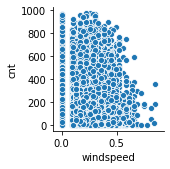

In [27]:
 g = sb.pairplot(data,
                  x_vars=['windspeed'], y_vars=["cnt"])

## Observation: 
Here the data points are more concentrated towards the moderate windspeed. However, at higher windspeed the trend shows that the count is generally less. Thus we include this feature.


# Casual Vs Count

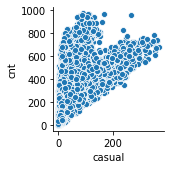

In [28]:
 g = sb.pairplot(data,
                  x_vars=['casual'], y_vars=["cnt"])

## Observation: 
With an increase in casual values the count is increasing. Thus this feature has a predictive power on count. But we do not include this feature, since we do not want to overfit the data.

# Registered Vs Count

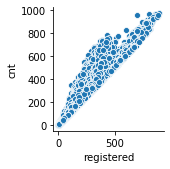

In [29]:
 g = sb.pairplot(data,
                  x_vars=['registered'], y_vars=["cnt"])

## Observation : 
As the registered users are increasing the count is also increasing linearly. Thus this feature has a very high predictive power on the value of count.

# Preprocessing:
1. Since season and month have high correlation we can discard any one of it. Since month gives more information we can remove season.
2. The dteday column also is like a running number and does not give any information with respect to the count, so we can drop that. Similarly, even the instant column can be discarded as its a running number in itself.
3. Since temp and atemp has high correlation, we remove atemp and just keep temp.
4. We remove the casual column since if we keep both registered and casual, the model would overfit.
5. We also remove working day since it can be derived from holiday and weekday.


# Generating the training and the testing set

In [30]:
X = data[['yr', 'mnth', 'hr', 'holiday','weathersit', 'temp', 'hum', 'weekday','windspeed','registered','cnt']]
t = data["cnt"].to_numpy()
X_train = X.sample(frac = 0.8)
X_test = X.drop(X_train.index)
t_train = X_train.pop('cnt')
t_test = X_test.pop('cnt')

## MLE Model

[3.960835349013962, 0.061035851028198834, 0.6211895761880567, 17.404059731689962, 0.9123954836170904, 85.64811420583914, -55.57847773915338, 0.5609495947108885, -0.7772261469839528, 1.0972014248494641]


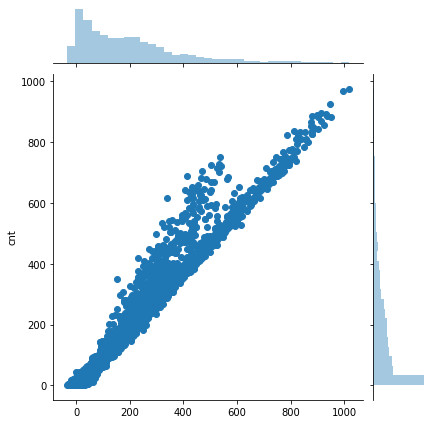

In [31]:
w = list(np.linalg.inv(X_train.T@X_train)@X_train.T@t_train)
y_mle = X_test@w
sb.jointplot(y_mle,t_test)
X_test.shape
print(w)

### MAP

[3.9588026055659356, 0.06142179028755401, 0.6220748978925466, 17.357134470260743, 0.8871171281466672, 85.44510533377365, -55.41664563188061, 0.560613835681232, -0.7246772961828274, 1.09730863588653]
[3.7304177986334386, 0.12764733171207981, 0.7413122133028464, 11.860799102277277, -1.8189379791513032, 60.8350642524271, -36.528488495470654, 0.5557588158880488, 2.9332588446654473, 1.1104815295891086]
[2.1450833308301753, 0.3854494406426723, 0.9869603940935449, 2.001878048434368, -3.7138013038424407, 11.180984696815857, -5.6857843814403735, 0.6649200566334577, 1.0978152583767058, 1.1390592475844168]
[0.020999382448963117, 0.19260326015208967, 0.5251457881065129, 0.007799391039986496, 0.003631744477814557, 0.05112900098919389, -0.005735663109808268, 0.11066594093022572, 0.008914229555941242, 1.1673746961981366]
[0.0010037396470340535, 0.011198963172093668, 0.02305224835075708, 4.3069674876730276e-05, 0.002161417912883334, 0.0009385327552925628, 0.0009149648990437158, 0.004954996501404377, 0

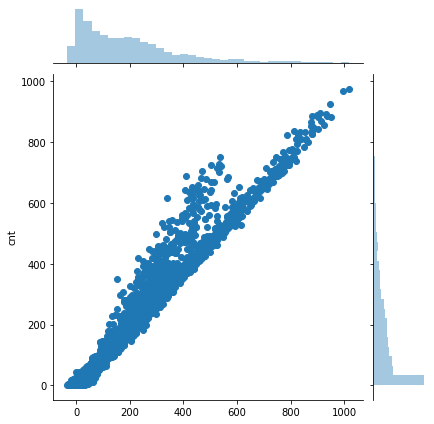

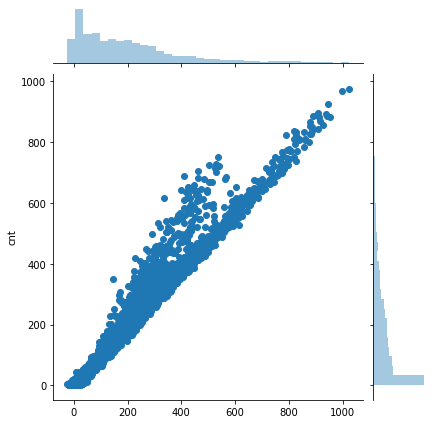

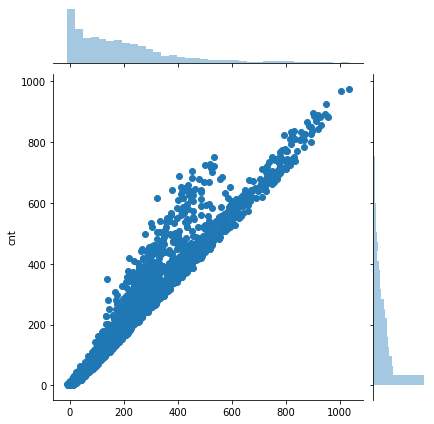

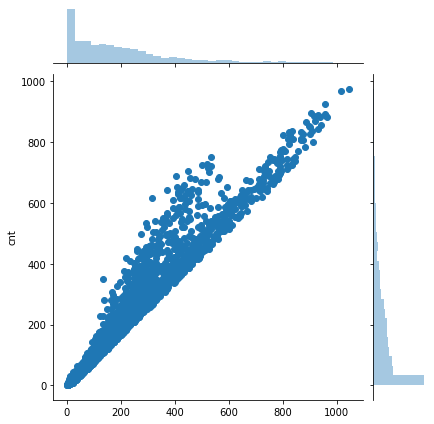

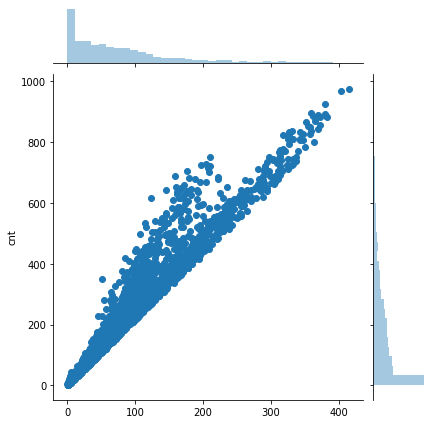

In [32]:
l = [1,176,3000,1000000,1000000000]
for i in l:
    w = list(np.linalg.inv(X_train.T@X_train+i*np.eye(10))@X_train.T@t_train)
    y_map=X_test@w
    sb.jointplot(y_map,t_test)
    print(w)


# Comments on the choice of lambda: 
As we can see weights of each feature for the corresponding value of lambda, for a very low value of lambda we observe that the weights of some of the columns are very high and some are very low. That means we are simply memorizing the training data. Thus as we increase the value of lambda, the weights of each feature becomes more distributed. Observe that for lambda equal to 3000 the value of the weights are appropriate,i.e not so high and not so low. This makes the model more adaptive to different data sets.

[2.1450833308301753,
 0.3854494406426723,
 0.9869603940935449,
 2.001878048434368,
 -3.7138013038424407,
 11.180984696815857,
 -5.6857843814403735,
 0.6649200566334577,
 1.0978152583767058,
 1.1390592475844168]

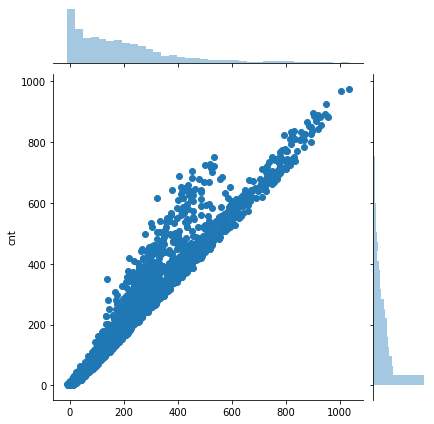

In [33]:
w = list(np.linalg.inv(X_train.T@X_train+3000*np.eye(10))@X_train.T@t_train)
y_map=X_test@w
sb.jointplot(y_map,t_test)
w

# Model Performance

## 1. Mean and Median Prediction Error

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
e_mle = abs(y_mle-t_test)
print("The mean prediction error for MLE",e_mle.mean())
print("The median prediction error for MLE",e_mle.median())
e_map = abs(y_map-t_test)
print("The mean prediction error for MAP",e_map.mean())
print("The median prediction error for MAP",e_map.median())

The mean prediction error for MLE 23.774339924091443
The median prediction error for MLE 15.320854753809051
The mean prediction error for MAP 24.696294551013228
The median prediction error for MAP 14.46258516858272


## 2. Q-Q Plot for MLE and MAP

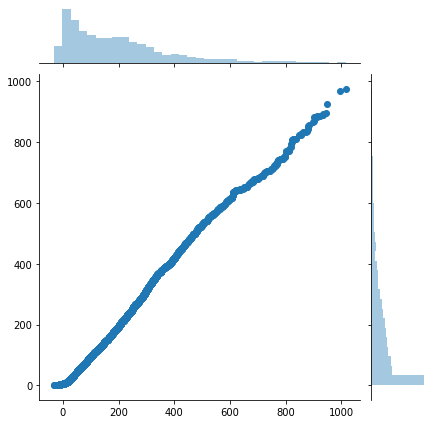

In [35]:
sb.jointplot(np.sort(y_mle),np.sort(t_test))

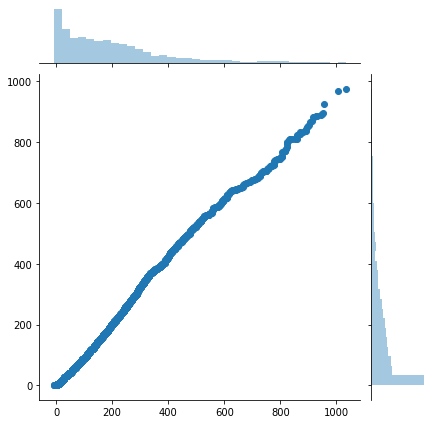

In [36]:
sb.jointplot(np.sort(y_map),np.sort(t_test))

## 3. R2 Score for MLE and MAP Model

In [37]:
from sklearn.metrics import r2_score
print("R2 Score for MLE is :",r2_score(t_test,y_mle))
print("R2 Score for MAP is :",r2_score(t_test,y_map))

R2 Score for MLE is : 0.9572112092176309
R2 Score for MAP is : 0.9498318070889746


# Which model is better and why?

As we can observe that the MLE model, performs better on this particular data set. However, the weights of each parameter in the MLE model are not appropriately distributed and some features have been given very high weight. i.e It has almost memorized this training data. On the other hand, MAP distributes the weights of each feature appropriately and thus makes the model more adaptable to different test data sets. 
Thus we can conclude that, if a test data set is similar to the training data set then the MLE performs better, however if different kind of data set is given, the MAP model would be able to perform better in such cases.